# CSV file 1.ushape


In [4]:
pip install mlxtend

### Importing and Basic Pre processing

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
data1=pd.read_csv("/content/1.ushape.csv")

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   3.159499363321345566e-02  99 non-null     float64
 1   9.869877579082642072e-01  99 non-null     float64
 2   0.000000000000000000e+00  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [8]:
data1.describe()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.505155,0.221042,0.505051
std,0.894313,0.590909,0.502519
min,-1.318500,-1.035702,0.000000
25%,-0.142935,-0.204478,0.000000
50%,0.474047,0.184147,1.000000
75%,1.129138,0.644323,1.000000
max,2.181372,1.571899,1.000000


In [9]:
data1.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [10]:
data1=data1.rename(columns={"3.159499363321345566e-02":"c1","9.869877579082642072e-01":"c2","0.000000000000000000e+00":"c3"})

In [11]:
data1.head()

,c1,c2,c3
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


Text(0, 0.5, 'c2')

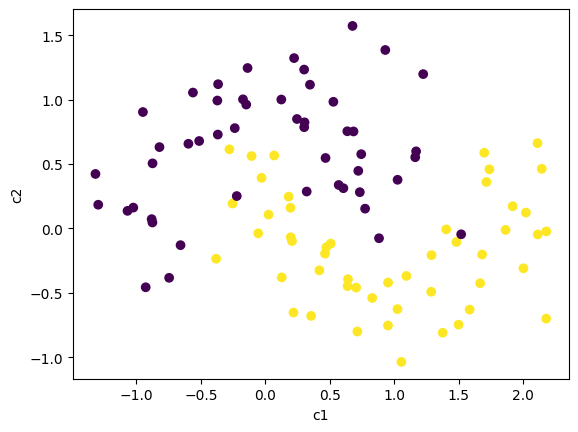

In [12]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data1['c1'], data1['c2'], c=data1['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [13]:
fv=data1.iloc[:,0:2]
cv=data1.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

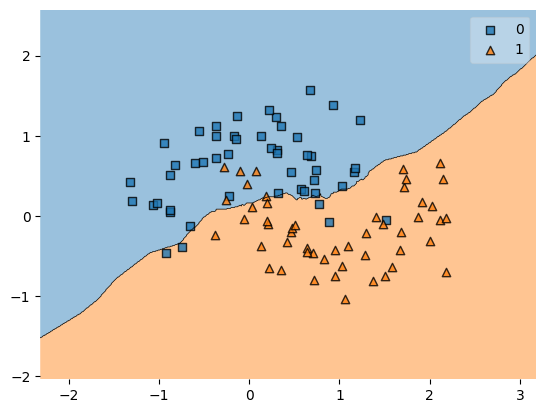

In [14]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

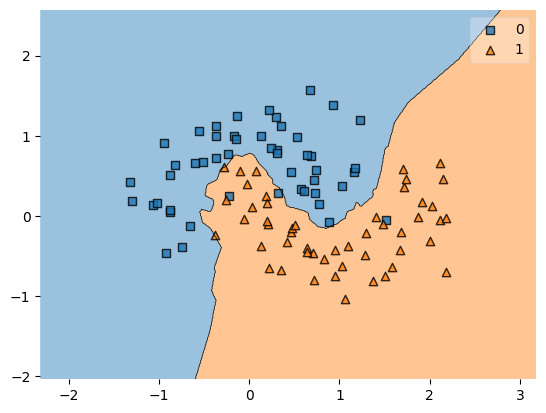

In [15]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

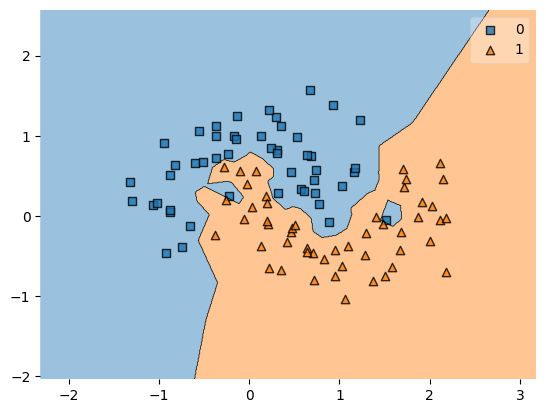

In [16]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [17]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [18]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [19]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

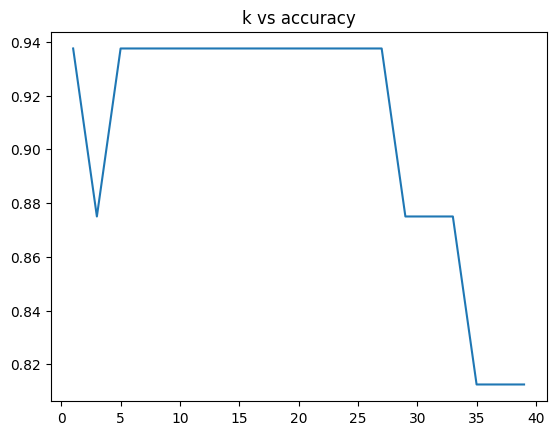

In [20]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

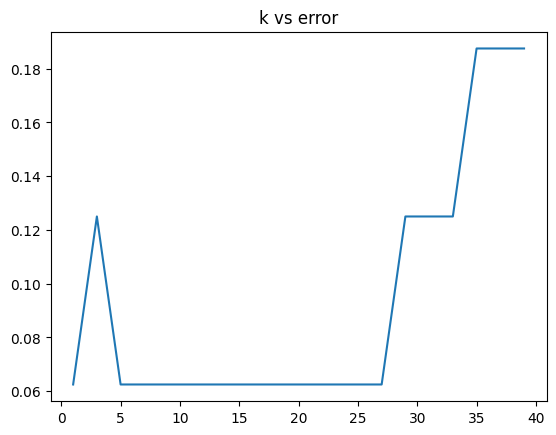

In [21]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [22]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 1
Accuracy score for the best k value: 0.85


In [23]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

0.85

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k=3. This means that our model does a good job of making predictions when it considers the three nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=3 gives us the best results. This tells us that our model is accurate and effective when it considers three neighbors to make predictions. So, both visually and numerically, we see that k=3 is the best choice for our model.

# Csv file 2.concerticcir1

In [24]:
pip install mlxtend


### Importing and Basic Pre processing

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
data2=pd.read_csv("/content/2.concerticcir1.csv")

In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   -3.828911738602102099e-01  99 non-null     float64
 1   -9.084004237811005300e-02  99 non-null     float64
 2   1.000000000000000000e+00   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [28]:
data2.describe()

,-3.828911738602102099e-01,-9.084004237811005300e-02,1.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,-0.007114,-0.018566,0.494949
std,0.579507,0.545499,0.502519
min,-1.131849,-1.289427,0.000000
25%,-0.450591,-0.433911,0.000000
50%,-0.020962,-0.023341,0.000000
75%,0.440364,0.426789,1.000000
max,1.129808,1.073060,1.000000


In [29]:
data2.head()

,-3.828911738602102099e-01,-9.084004237811005300e-02,1.000000000000000000e+00
0,-0.020962,-0.477874,1.0
1,-0.396116,-1.289427,0.0
2,-0.618130,-0.063837,1.0
3,0.703478,-0.187038,1.0
4,-0.459705,0.694775,0.0


In [30]:
data2=data2.rename(columns={"-3.828911738602102099e-01":"c1","-9.084004237811005300e-02":"c2","1.000000000000000000e+00":"c3"})

In [31]:
data2.head()

,c1,c2,c3
0,-0.020962,-0.477874,1.0
1,-0.396116,-1.289427,0.0
2,-0.618130,-0.063837,1.0
3,0.703478,-0.187038,1.0
4,-0.459705,0.694775,0.0


Text(0, 0.5, 'c2')

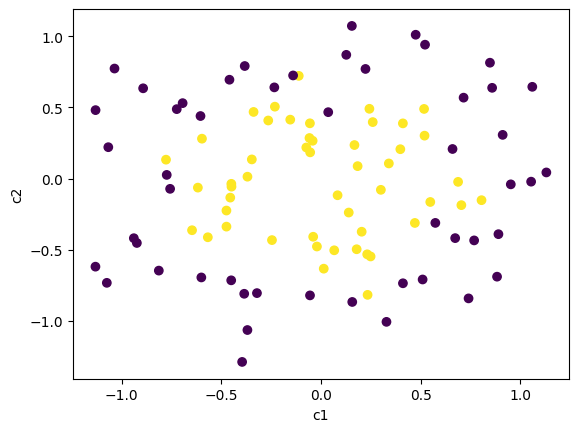

In [32]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data2['c1'], data2['c2'], c=data2['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [33]:
fv=data2.iloc[:,0:2]
cv=data2.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

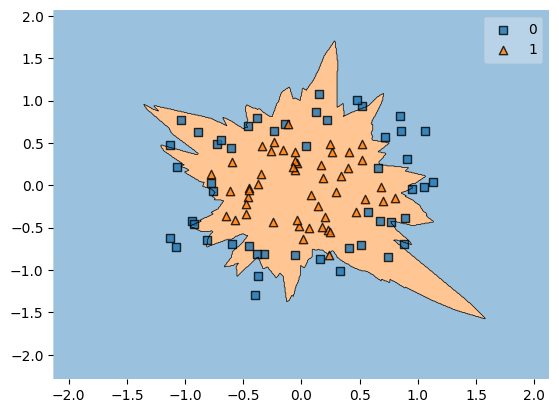

In [34]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

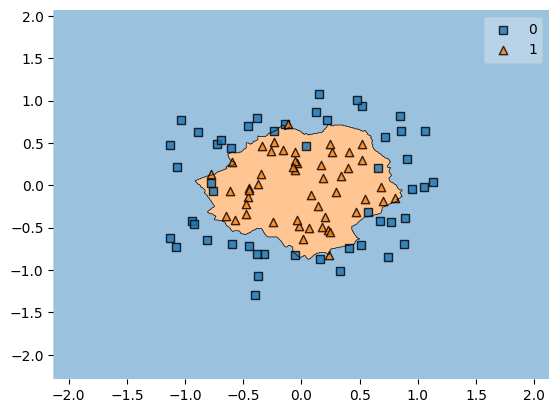

In [35]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

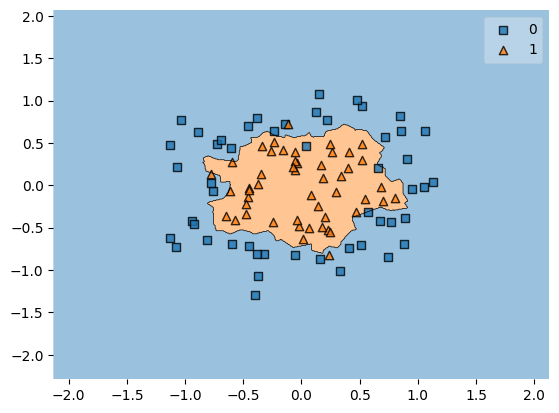

In [36]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [37]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [38]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [39]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

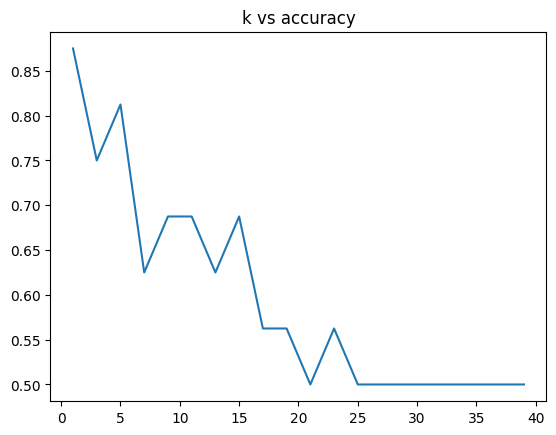

In [40]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

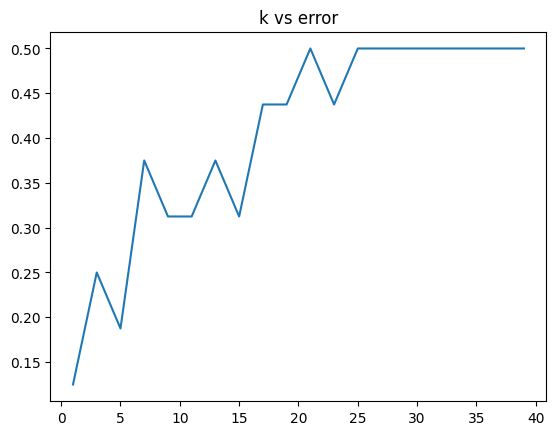

In [41]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [42]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 7
Accuracy score for the best k value: 0.9


In [43]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

0.9

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k=7. This means that our model does a good job of making predictions when it considers the seven nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=7 gives us the best results. This tells us that our model is accurate and effective when it considers seven neighbors to make predictions. So, both visually and numerically, we see that k=7 is the best choice for our model.

# Csv file 3.concertriccir2

In [44]:
pip install mlxtend


### Importing and Basic Pre processing

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
data3=pd.read_csv("/content/3.concertriccir2.csv")

In [47]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   7.003345706103683010e-01   499 non-null    float64
 1   -2.470675778972781789e-01  499 non-null    float64
 2   0.000000000000000000e+00   499 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [48]:
data3.describe()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
count,499.000000,499.000000,499.000000
mean,1.886078,1.874116,0.501002
std,1.932484,1.986577,0.500501
min,-3.950019,-3.935098,0.000000
25%,0.403288,0.433397,0.000000
50%,2.204484,2.115254,1.000000
75%,3.349258,3.391114,1.000000
max,6.712027,7.848278,1.000000


In [49]:
data3.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [50]:
data3=data3.rename(columns={"7.003345706103683010e-01":"c1","-2.470675778972781789e-01":"c2","0.000000000000000000e+00":"c3"})

In [51]:
data3.head()

,c1,c2,c3
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


Text(0, 0.5, 'c2')

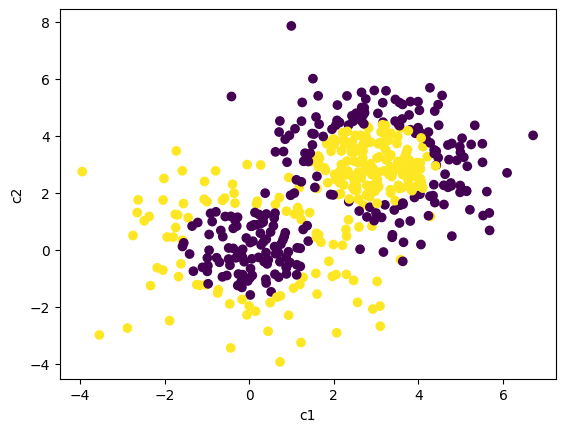

In [52]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data3['c1'], data3['c2'], c=data3['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [53]:
fv=data3.iloc[:,0:2]
cv=data3.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

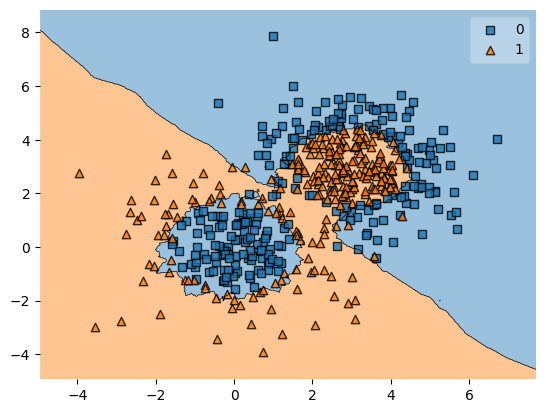

In [54]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

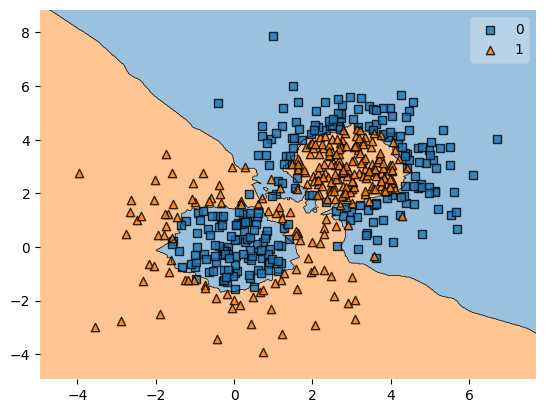

In [55]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

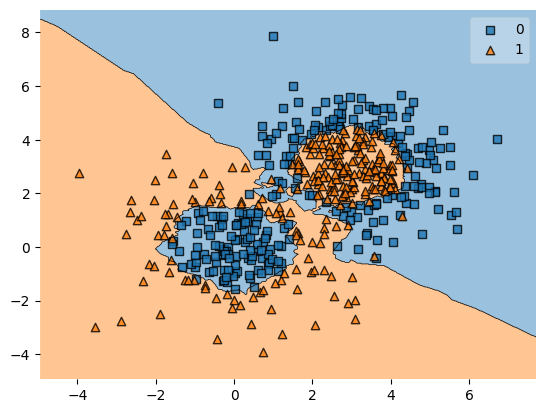

In [56]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [57]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [58]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [59]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

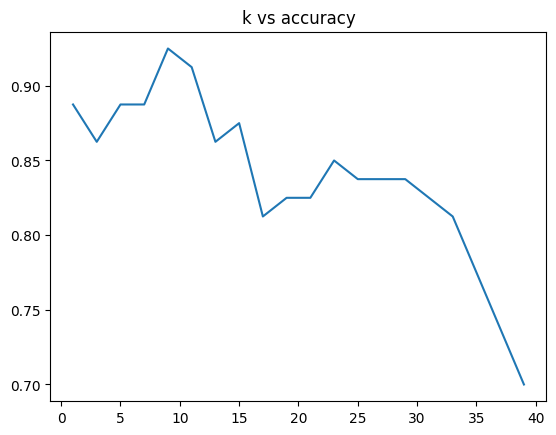

In [60]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

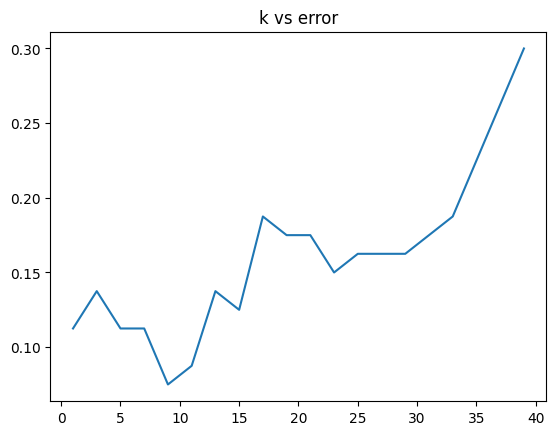

In [61]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [62]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 1
Accuracy score for the best k value: 0.91


In [63]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

0.84

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k=5. This means that our model does a good job of making predictions when it considers the five nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=5 gives us the best results. This tells us that our model is accurate and effective when it considers five neighbors to make predictions. So, both visually and numerically, we see that k=5 is the best choice for our model.

# CSV file 4.linearsep


In [64]:
pip install mlxtend

### Importing and Basic Pre processing

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
data4=pd.read_csv("/content/4.linearsep.csv")

In [67]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   -1.774965779898558527e-01  99 non-null     float64
 1   9.304962660386675299e-01   99 non-null     float64
 2   1.000000000000000000e+00   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [68]:
data4.describe()

,-1.774965779898558527e-01,9.304962660386675299e-01,1.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.942064,1.864884,0.494949
std,1.249664,0.710911,0.502519
min,-1.801737,0.568025,0.000000
25%,-0.123075,1.312047,0.000000
50%,1.197681,1.822025,0.000000
75%,1.882927,2.253250,1.000000
max,3.108743,3.892678,1.000000


In [69]:
data4.head()

,-1.774965779898558527e-01,9.304962660386675299e-01,1.000000000000000000e+00
0,1.977424,1.766155,0.0
1,1.800024,1.700343,0.0
2,-0.770837,2.359163,1.0
3,-0.308009,1.594063,1.0
4,0.614721,2.434898,1.0


In [70]:
data4=data4.rename(columns={"-1.774965779898558527e-01":"c1","9.304962660386675299e-01":"c2","1.000000000000000000e+00":"c3"})

In [71]:
data4.head()

,c1,c2,c3
0,1.977424,1.766155,0.0
1,1.800024,1.700343,0.0
2,-0.770837,2.359163,1.0
3,-0.308009,1.594063,1.0
4,0.614721,2.434898,1.0


Text(0, 0.5, 'c2')

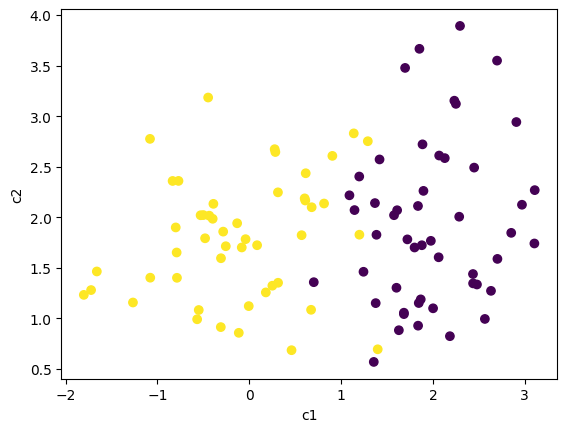

In [72]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data4['c1'], data4['c2'], c=data4['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [73]:
fv=data4.iloc[:,0:2]
cv=data4.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

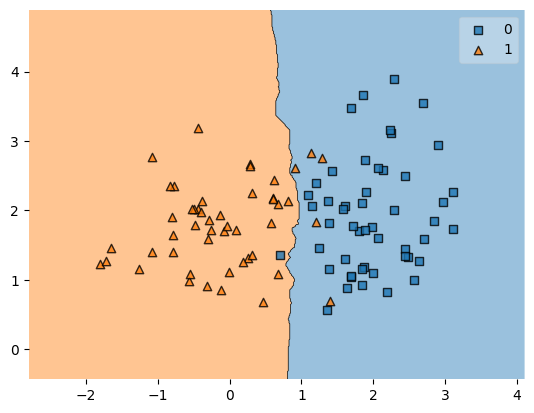

In [74]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

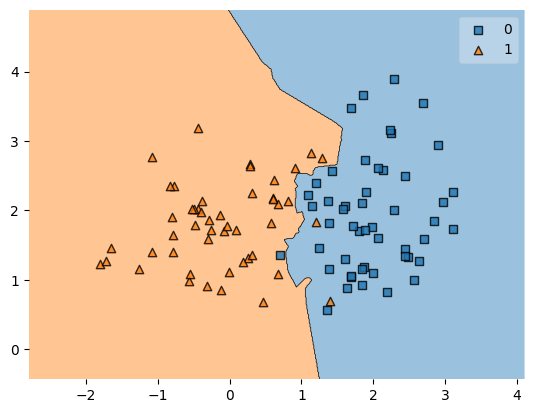

In [75]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

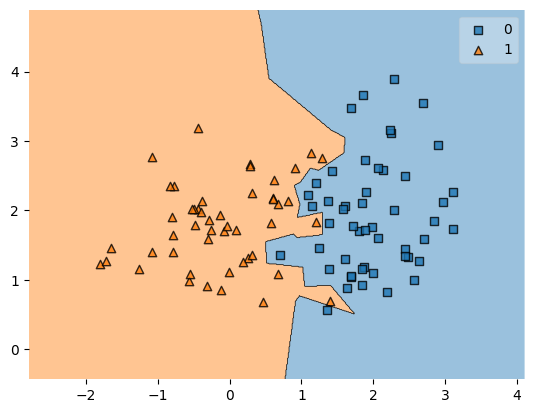

In [76]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [77]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=42,stratify=cv)

In [78]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [79]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

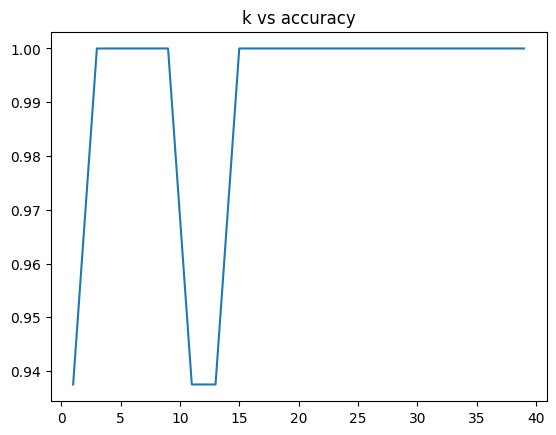

In [80]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")


Text(0.5, 1.0, 'k vs error')

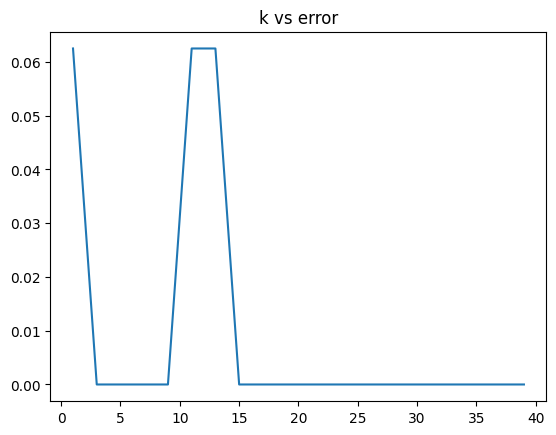

In [81]:

plt.plot(k,err_cv)
plt.title("k vs error")

In [82]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 1
Accuracy score for the best k value: 0.95


In [83]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

0.95

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k=3. This means that our model does a good job of making predictions when it considers the three nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=3 gives us the best results. This tells us that our model is accurate and effective when it considers three neighbors to make predictions. So, both visually and numerically, we see that k=3 is the best choice for our model.

# Csv file 5.outlier

In [84]:
pip install mlxtend


### Importing and Basic Pre processing

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
data5=pd.read_csv("/content/5.outlier.csv")

In [87]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   -17.89699968  599 non-null    float64
 1   7.662423364   599 non-null    float64
 2   0             599 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [88]:
data5.describe()

,-17.89699968,7.662423364,0
count,599.000000,599.000000,599.000000
mean,0.091559,0.458541,0.500835
std,21.238906,12.692977,0.500417
min,-29.969271,-29.999631,0.000000
25%,-21.252064,-7.764701,0.000000
50%,2.689472,-0.384654,1.000000
75%,20.832823,9.081005,1.000000
max,29.957195,34.869783,1.000000


In [89]:
data5.head()

,-17.89699968,7.662423364,0
0,-26.343161,-3.055257,0
1,-19.059771,-8.531838,0
2,-16.383898,-2.352667,0
3,-12.926541,9.074994,0
4,-22.329233,-13.504121,0


In [90]:
data5=data5.rename(columns={"-17.89699968":"c1","7.662423364":"c2","0":"c3"})

In [91]:
data5.head()

,c1,c2,c3
0,-26.343161,-3.055257,0
1,-19.059771,-8.531838,0
2,-16.383898,-2.352667,0
3,-12.926541,9.074994,0
4,-22.329233,-13.504121,0


Text(0, 0.5, 'c2')

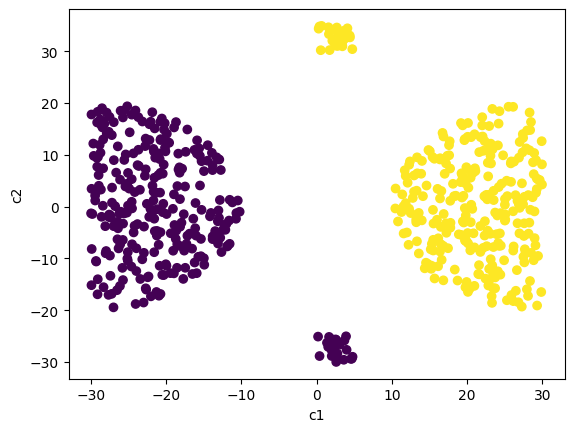

In [92]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data5['c1'], data5['c2'], c=data5['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [93]:
fv=data5.iloc[:,0:2]
cv=data5.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

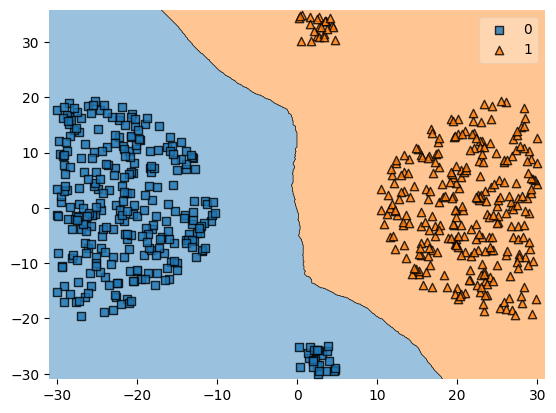

In [94]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

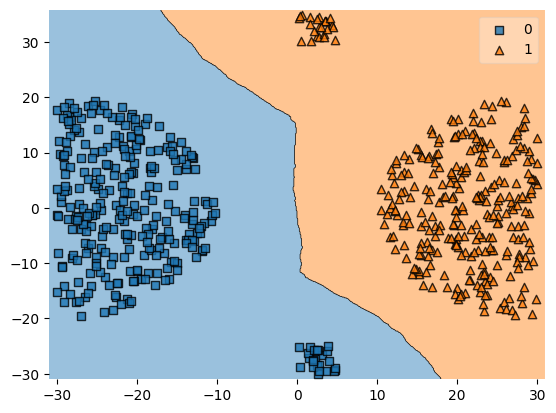

In [95]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

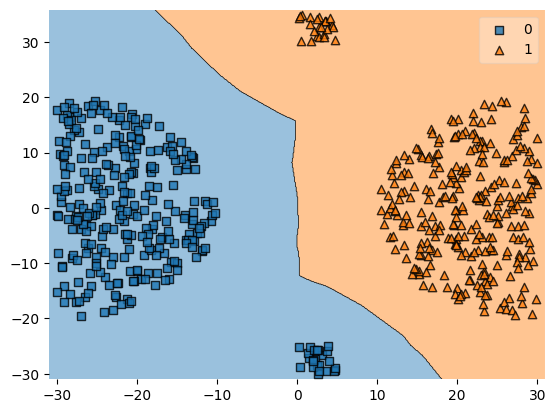

In [96]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [97]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [98]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [99]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

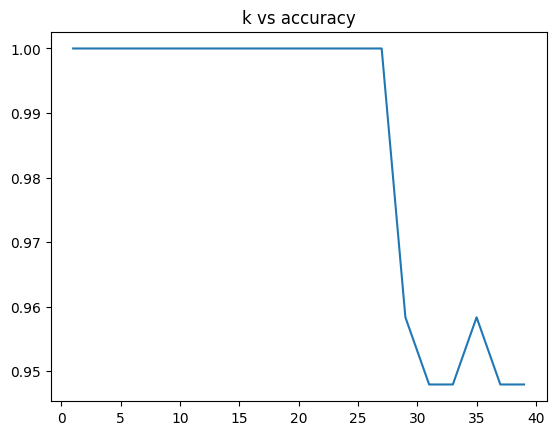

In [100]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

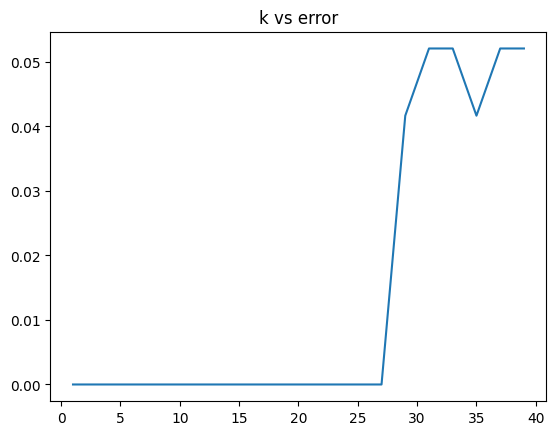

In [101]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [102]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 1
Accuracy score for the best k value: 1.0


In [103]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

1.0

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k anywhere between k=1 to 25. This means that our model does a good job of making predictions when it considers the k in range 1 to 25 nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=1 to 25 gives us the best results. This tells us that our model is accurate and effective when it considers k in range 1 to 25 neighbors to make predictions. So, both visually and numerically, we see that k=1 to  25 is the best choice for our model.

# Csv file 6.overlap

In [104]:
pip install mlxtend


### Importing and Basic Pre processing

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [106]:
data6=pd.read_csv("/content/6.overlap.csv")

In [107]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7       99 non-null     float64
 1   3.2     99 non-null     float64
 2   0       99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [108]:
data6.describe()

,7,3.2,0
count,99.000000,99.000000,99.000000
mean,6.254545,2.868687,0.505051
std,0.661981,0.332782,0.502519
min,4.900000,2.000000,0.000000
25%,5.800000,2.700000,0.000000
50%,6.300000,2.900000,1.000000
75%,6.700000,3.000000,1.000000
max,7.900000,3.800000,1.000000


In [109]:
data6.head()

,7,3.2,0
0,6.4,3.2,0
1,6.9,3.1,0
2,5.5,2.3,0
3,6.5,2.8,0
4,5.7,2.8,0


In [110]:
data6=data6.rename(columns={"7":"c1","3.2":"c2","0":"c3"})

In [111]:
data6.head()

,c1,c2,c3
0,6.4,3.2,0
1,6.9,3.1,0
2,5.5,2.3,0
3,6.5,2.8,0
4,5.7,2.8,0


Text(0, 0.5, 'c2')

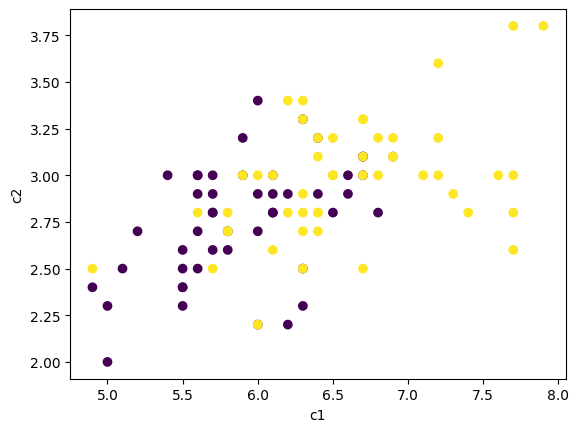

In [112]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data6['c1'], data6['c2'], c=data6['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [113]:
fv=data6.iloc[:,0:2]
cv=data6.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

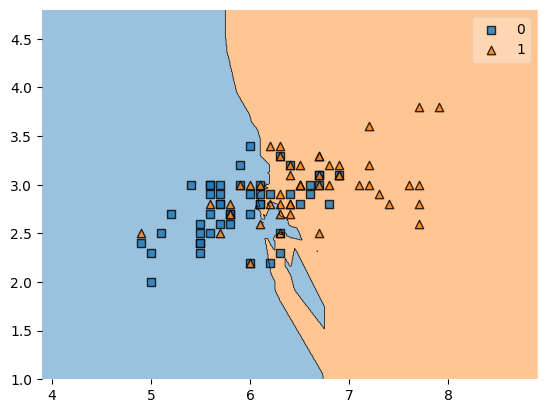

In [114]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

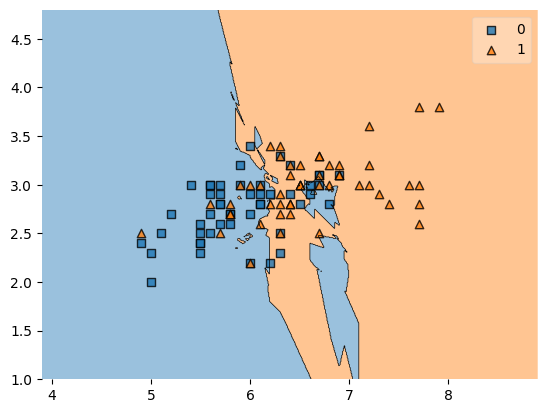

In [115]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

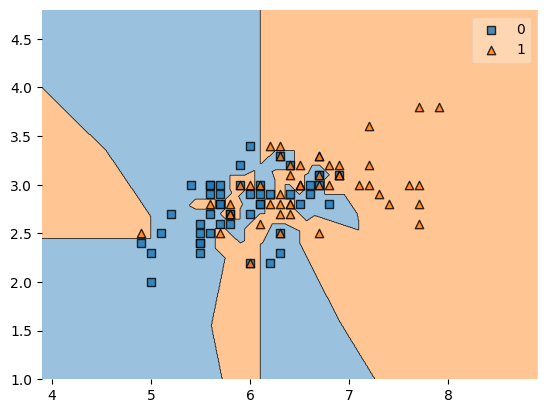

In [116]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [117]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [118]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [119]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

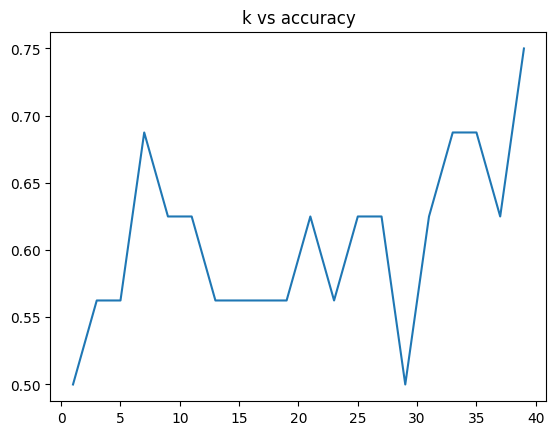

In [120]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

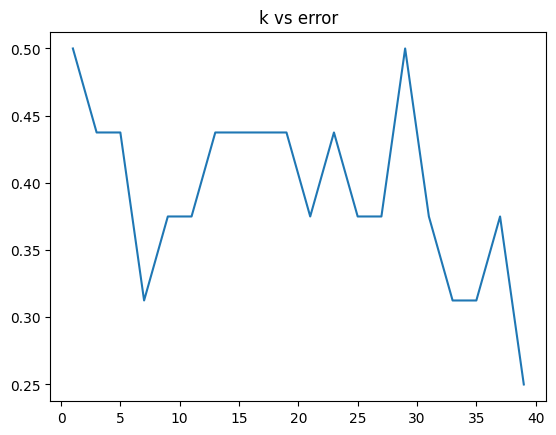

In [121]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [122]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 19
Accuracy score for the best k value: 0.9


In [123]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=9)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

0.8

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k=9. This means that our model does a good job of making predictions when it considers the nine nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=9 gives us the best results. This tells us that our model is accurate and effective when it considers nine neighbors to make predictions. So, both visually and numerically, we see that k=9 is the best choice for our model.

# Csv file 7.xor

pip install mlxtend


### Importing and Basic Pre processing

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [125]:
data7=pd.read_csv("/content/7.xor.csv")

In [126]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   1.764052345967664026e+00   499 non-null    float64
 1   4.001572083672232938e-01   499 non-null    float64
 2   -1.000000000000000000e+00  499 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [127]:
data7.describe()

,1.764052345967664026e+00,4.001572083672232938e-01,-1.000000000000000000e+00
count,499.000000,499.000000,499.000000
mean,-0.069032,-0.026000,-0.038076
std,0.972041,1.001758,1.000278
min,-2.659172,-3.046143,-1.000000
25%,-0.727321,-0.681809,-1.000000
50%,-0.098453,-0.035095,-1.000000
75%,0.584201,0.609612,1.000000
max,2.696224,2.759355,1.000000


In [128]:
data7.head()

,1.764052345967664026e+00,4.001572083672232938e-01,-1.000000000000000000e+00
0,0.978738,2.240893,-1.0
1,1.867558,-0.977278,1.0
2,0.950088,-0.151357,1.0
3,-0.103219,0.410599,1.0
4,0.144044,1.454274,-1.0


In [129]:
data7=data7.rename(columns={"1.764052345967664026e+00":"c1","4.001572083672232938e-01":"c2","-1.000000000000000000e+00":"c3"})

In [130]:
data7.head()

,c1,c2,c3
0,0.978738,2.240893,-1.0
1,1.867558,-0.977278,1.0
2,0.950088,-0.151357,1.0
3,-0.103219,0.410599,1.0
4,0.144044,1.454274,-1.0


Text(0, 0.5, 'c2')

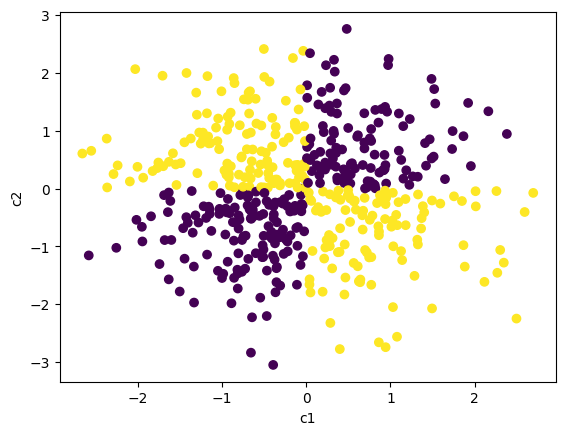

In [131]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data7['c1'], data7['c2'], c=data7['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [132]:
fv=data7.iloc[:,0:2]
cv=data7.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

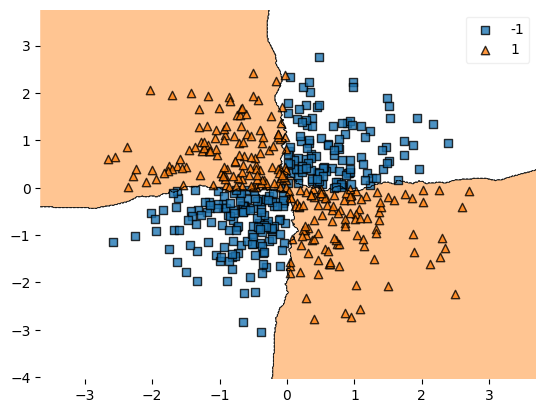

In [133]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

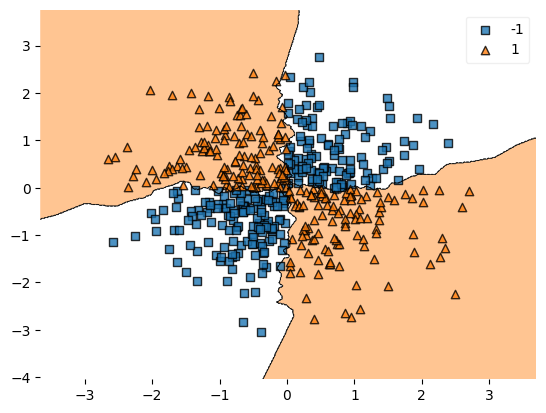

In [134]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

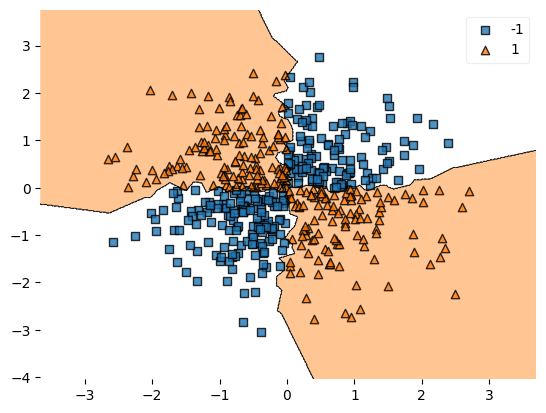

In [135]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [136]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [137]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [138]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

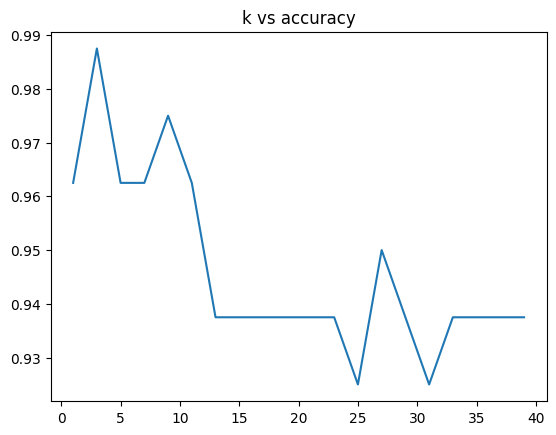

In [139]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

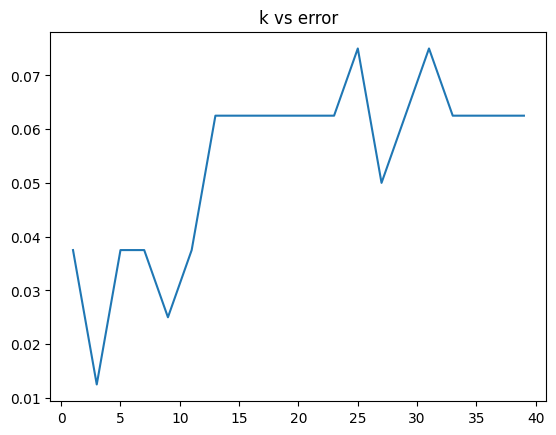

In [140]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [141]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 7
Accuracy score for the best k value: 0.99


In [142]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

0.96

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k=5. This means that our model does a good job of making predictions when it considers the five nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=5 gives us the best results. This tells us that our model is accurate and effective when it considers five neighbors to make predictions. So, both visually and numerically, we see that k=5 is the best choice for our model.

# Csv file 8.twospirals

In [143]:
pip install mlxtend


### Importing and Basic Pre processing

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [145]:
data8=pd.read_csv("/content/8.twospirals.csv")

In [146]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   -2.543456253616113  1999 non-null   float64
 1   -10.81635752298698  1999 non-null   float64
 2   0                   1999 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [147]:
data8.describe()

,-2.543456253616113,-10.81635752298698,0
count,1999.000000,1999.000000,1999.000000
mean,0.037080,0.175748,0.500250
std,5.581945,6.477060,0.500125
min,-9.462311,-11.017154,0.000000
25%,-4.596124,-4.784197,0.000000
50%,-0.116039,0.045292,1.000000
75%,4.837426,5.462223,1.000000
max,9.659887,11.227412,1.000000


In [148]:
data8.head()

,-2.543456253616113,-10.81635752298698,0
0,9.434466,-2.572000,0
1,3.368646,-10.194671,0
2,1.341407,-4.204140,0
3,9.547758,-2.220580,0
4,-3.533291,6.424351,0


In [149]:
data8=data8.rename(columns={"-2.543456253616113":"c1","-10.81635752298698":"c2","0":"c3"})

In [150]:
data8.head()

,c1,c2,c3
0,9.434466,-2.572000,0
1,3.368646,-10.194671,0
2,1.341407,-4.204140,0
3,9.547758,-2.220580,0
4,-3.533291,6.424351,0


Text(0, 0.5, 'c2')

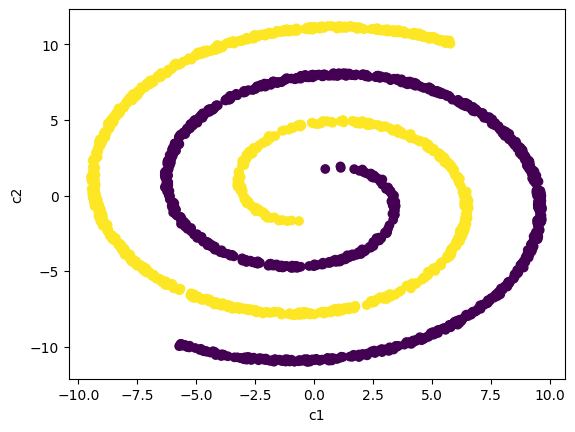

In [151]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data8['c1'], data8['c2'], c=data8['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [152]:
fv=data8.iloc[:,0:2]
cv=data8.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

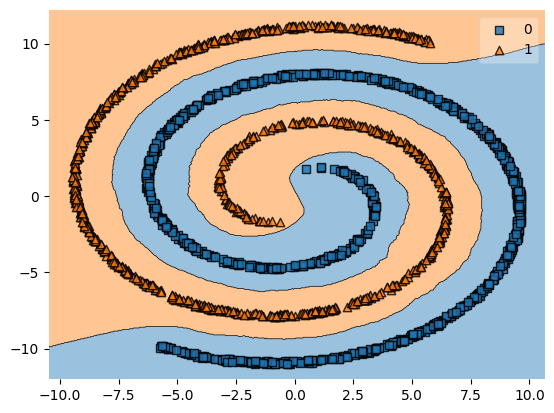

In [153]:
knn=KNeighborsClassifier(n_neighbors=40)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

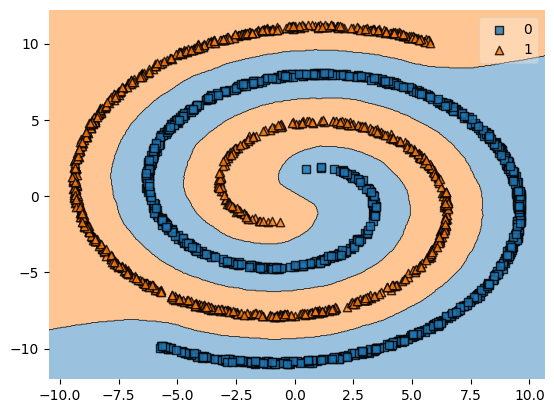

In [154]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

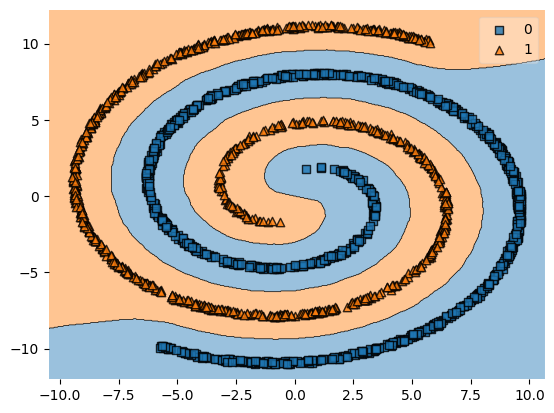

In [155]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [156]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [157]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [158]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

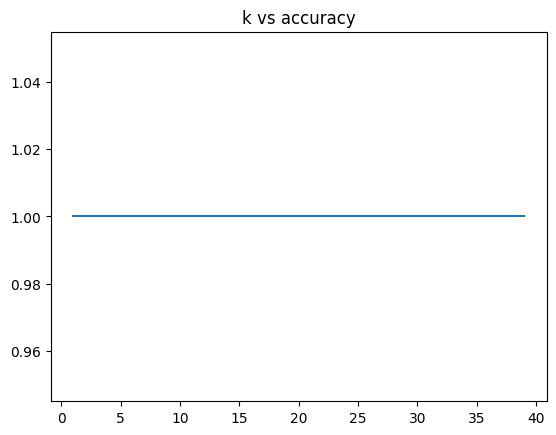

In [159]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

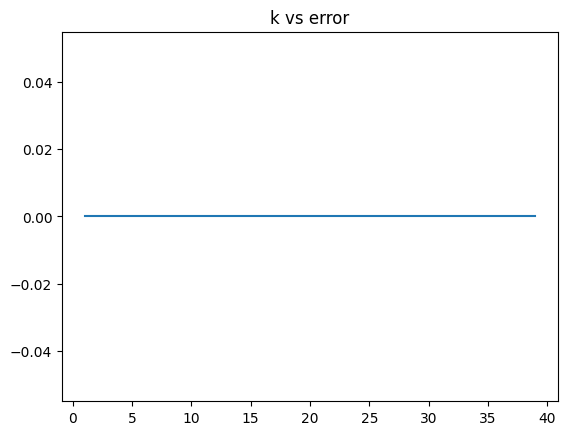

In [160]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [161]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 1
Accuracy score for the best k value: 1.0


In [162]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=10)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

1.0

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use anywhere  from  k=1 to 30. This means that our model does a good job of making predictions when it considers the k in range 1 to 30 nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=1 to 30 gives us the best results. This tells us that our model is accurate and effective when it considers k in range 1 to 30 neighbors to make predictions. So, both visually and numerically, we see that k=1 to 30 is the best choice for our model.

# Csv file 9.random

In [163]:
pip install mlxtend


### Importing and Basic Pre processing

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [165]:
data9=pd.read_csv("/content/9.random.csv")

In [166]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3.74E-01  399 non-null    float64
 1   1.08E+00  399 non-null    float64
 2   0.00E+00  399 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [167]:
data9.describe()

,3.74E-01,1.08E+00,0.00E+00
count,399.000000,399.000000,399.000000
mean,0.474016,0.677843,0.506266
std,0.303831,0.276635,0.500588
min,-0.206000,0.094500,0.000000
25%,0.245000,0.429500,0.000000
50%,0.488000,0.688000,1.000000
75%,0.727000,0.921500,1.000000
max,1.100000,1.240000,1.000000


In [168]:
data9.head()

,3.74E-01,1.08E+00,0.00E+00
0,0.445,1.140,1.0
1,0.514,1.130,0.0
2,0.466,1.240,1.0
3,0.371,0.968,1.0
4,0.499,1.110,0.0


In [169]:
data9=data9.rename(columns={"3.74E-01":"c1","1.08E+00":"c2","0.00E+00":"c3"})

In [170]:
data9.head()

,c1,c2,c3
0,0.445,1.140,1.0
1,0.514,1.130,0.0
2,0.466,1.240,1.0
3,0.371,0.968,1.0
4,0.499,1.110,0.0


Text(0, 0.5, 'c2')

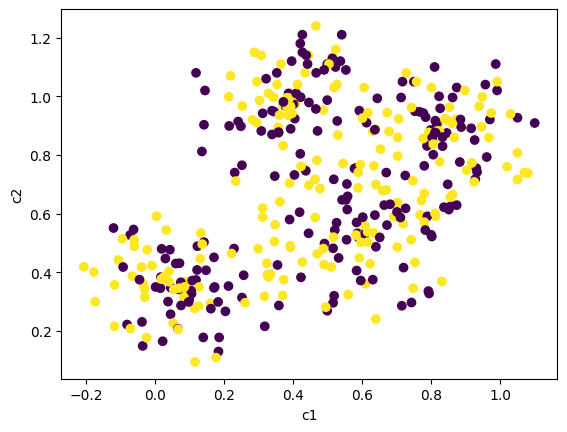

In [171]:
#  Scatter plot of X vs Y, colored by the third column

plt.scatter(data9['c1'], data9['c2'], c=data9['c3'])
plt.xlabel('c1')
plt.ylabel('c2')

In [172]:
fv=data9.iloc[:,0:2]
cv=data9.iloc[:,-1]

### Underfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

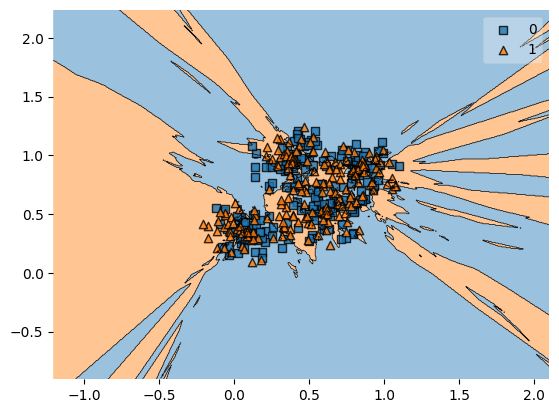

In [173]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Best Fit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

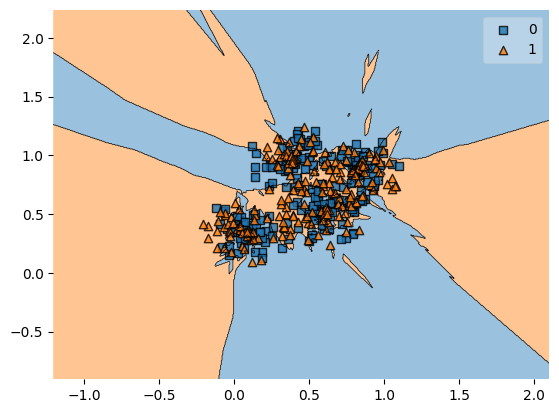

In [174]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Overfit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

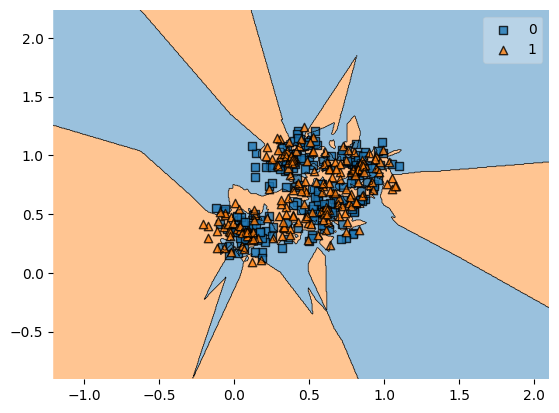

In [175]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(fv,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

### Testing Accuracy using Cross Validation

In [176]:
## splitting the data into test and train data


x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [177]:
# cross validation


x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [178]:
## Finding the accuracy and error for multiple K values

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

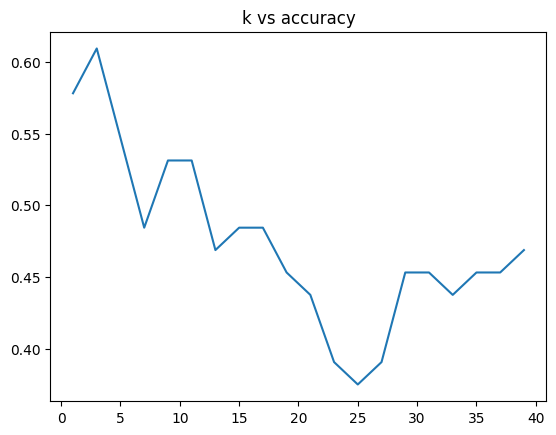

In [179]:
#plotting Accuracy and Error

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

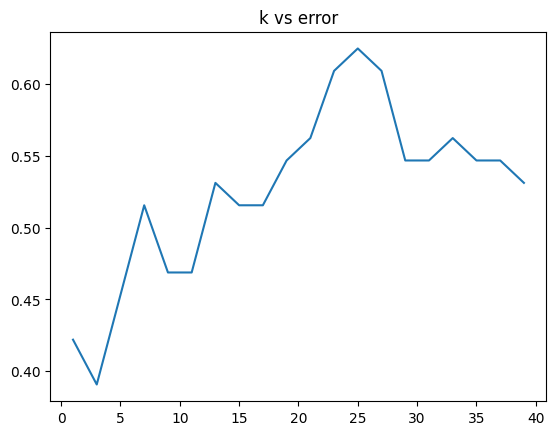

In [180]:
plt.plot(k,err_cv)
plt.title("k vs error")

In [181]:
##  Finding best fit  k values

k_values = range(1, 40, 2)

best_k = None
best_accuracy = 0.0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainf, y_trainf)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Accuracy score for the best k value: {best_accuracy}")

Best k value: 23
Accuracy score for the best k value: 0.55


In [182]:
## Testing accuracy on the unseen data

knn=KNeighborsClassifier(n_neighbors=9)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)

0.4875

### Conclusions

Insight: When we look at the decision boundary - the way our model separates different classes - we find that it works best when we use k=9. This means that our model does a good job of making predictions when it considers the nine nearest neighbors. Similarly, when we check the accuracy of our model - how often it makes correct predictions - we also find that using k=9 gives us the best results. This tells us that our model is accurate and effective when it considers nine neighbors to make predictions. So, both visually and numerically, we see that k=9 is the best choice for our model.